In [1]:
import matplotlib
#matplotlib.use('Agg')
import sys
import gc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter
from scipy.stats.mstats import gmean


# Fontsize
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

    # Fonts 
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

# Virial Radius

In [2]:
# The virial radius R200
import pandas as pd
Rvir200 = pd.read_csv('../Data/Halo_General/RVir200.csv')
Rvir200.keys()

Index(['DM', 'MHD'], dtype='object')

# Closest radii to Rvir found for lvl 4MHD and DM
Radii compraison and percent error

In [3]:
def get_radii(lvl='level4'):
    # Se define el nivel al cual se obtendran las graficas
    #lvl = 'level3'
    #lvl = 'level4'

    # Los niveles tienen un conjunto distinto de halos
    halonums = None
    if lvl == 'level3':
        halonums = [6,16,21,23,24,27]
    if lvl == 'level4':
        halonums = range(1,31)

    # Measurements near rvir    
    axes_Rvir_MHD = np.loadtxt("../Data/Halo_Detail/"+lvl+"_MHD/"+"Semiaxes_rvir_1e2rvir.csv", delimiter = ',')[:,:3]
    radsvMHD = gmean(axes_Rvir_MHD,axis = 1)

    axes_Rvir_MHD = {}
    axes_Rvir_DM = {}

    # Recorre los halos para encontrar la diferencia entre el radio virial 
    # y el radio sampleado mas cercano
    for i in halonums:
        # Obtiene el nombre de la carpeta para el halo especifico
        # The difference
        print("-------------- halo "+str(i)+"---------------------")
        halo = 'halo_'+str(i)
        # Consulta los semiejes de DM y MHD
        arrDM = np.loadtxt("../Data/Halo_Detail/"+lvl+"_DM/"+halo+"/"+"abc_"+lvl+"_DM_"+halo+".txt", delimiter = ',')
        # The list of all radii sampled
        radsDM = gmean(arrDM,axis = 1)
        # The minimum difference
        argminDM = np.argmin(np.abs(radsDM-Rvir200['DM'][i-1]))
        axes_Rvir_DM[i] = arrDM[argminDM]
        print('DM: ', Rvir200['DM'][i-1],radsDM[argminDM],100*abs(Rvir200['DM'][i-1]-radsDM[argminDM])/Rvir200['DM'][i-1])

        # Consulta los semiejes de DM y MHD
        arrMHD = np.loadtxt("../Data/Halo_Detail/"+lvl+"_MHD/"+halo+"/"+"abc_"+lvl+"_MHD_"+halo+".txt", delimiter = ',')

        # The list of all radii sampled
        radsMHD = gmean(arrMHD,axis = 1)
        # The minimum difference
        argminMHD = np.argmin(np.abs(radsMHD-Rvir200['MHD'][i-1]))
        axes_Rvir_MHD[i] = arrMHD[argminMHD]
        print('MHD: ',Rvir200['MHD'][i-1],radsMHD[argminMHD],100*abs(Rvir200['MHD'][i-1]-radsMHD[argminMHD])/Rvir200['MHD'][i-1])
    return axes_Rvir_DM, axes_Rvir_MHD

In [4]:
axes_DM_level3, axes_MHD_level3 = get_radii(lvl='level3')
axes_DM_level4, axes_MHD_level4 = get_radii(lvl='level4')
print(axes_DM_level3)

-------------- halo 6---------------------
DM:  191.84 191.7405128479003 0.051859441252970206
MHD:  189.342 190.1786330468807 0.4418634253787738
-------------- halo 16---------------------
DM:  212.59 212.62234449386602 0.015214494503984302
MHD:  212.632 212.54536928458612 0.04074208746279461
-------------- halo 21---------------------
DM:  219.52700000000002 219.73142027854922 0.09311851323491302
MHD:  219.82299999999998 220.25004029273984 0.19426551941328282
-------------- halo 23---------------------
DM:  217.768 217.7925109863281 0.01125555009372171
MHD:  215.959 213.3578807115554 1.204450515349954
-------------- halo 24---------------------
DM:  217.44 217.31320023536682 0.05831482920951823
MHD:  215.14700000000002 213.96276354789762 0.5504313107328462
-------------- halo 27---------------------
DM:  228.03599999999997 227.90813446044916 0.05607252343963719
MHD:  226.225 223.48400950431815 1.211621392720452
-------------- halo 1---------------------
DM:  196.92700000000002 193.917

# Plots

In [5]:
print(axes_DM_level4)

{1: array([263.02679919, 190.47687789, 145.5495045 ]), 2: array([301.99517204, 238.92135896, 166.05775493]), 3: array([263.02679919, 224.62912812, 189.39202399]), 4: array([301.99517204, 179.44600897, 157.63268947]), 5: array([263.02679919, 173.83304486, 155.56974847]), 6: array([263.02679919, 171.25278905, 141.3916926 ]), 7: array([301.99517204, 185.88979678, 138.05265779]), 8: array([263.02679919, 215.2593725 , 145.97421112]), 9: array([263.02679919, 170.11231514, 158.14742033]), 10: array([263.02679919, 171.53405854, 154.34809474]), 11: array([398.10717055, 186.7097082 , 177.45930448]), 12: array([229.08676528, 215.63585816, 162.076426  ]), 13: array([263.02679919, 191.89831567, 143.00922778]), 14: array([263.02679919, 229.78304227, 198.24537183]), 15: array([263.02679919, 185.22049194, 142.81464927]), 16: array([263.02679919, 230.15263913, 165.52457543]), 17: array([199.5262315 , 186.39817944, 172.99902457]), 18: array([301.99517204, 186.65000469, 168.96829979]), 19: array([229.086

In [6]:
def get_abc_axis(lvl='level4'):
    # Los niveles tienen un conjunto distinto de halos
    halonums = None
    if lvl == 'level3':
        halonums = [6,16,21,23,24,27]
    if lvl == 'level4':
        halonums = range(1,31)

    # Measurements near rvir    

    T_MHD = {}
    ba_MHD = {}
    ca_MHD = {}
    radius_MHD = {}
    T_DM = {}
    ba_DM = {}
    ca_DM = {}
    radius_DM = {}

    # Recorre los halos para encontrar la diferencia entre el radio virial 
    # y el radio sampleado mas cercano
    for i in halonums:
        # Obtiene el nombre de la carpeta para el halo especifico
        halo = 'halo_'+str(i)

        # Consulta los semiejes de DM y MHD
        arrDM = np.loadtxt("../Data/Halo_Detail/"+lvl+"_DM/"+halo+"/"+"abc_"+lvl+"_DM_"+halo+".txt", delimiter = ',')
        arrMHD = np.loadtxt("../Data/Halo_Detail/"+lvl+"_MHD/"+halo+"/"+"abc_"+lvl+"_MHD_"+halo+".txt", delimiter = ',')        
        
        # Obtiene los semiejes (planos y sin reescalar)
        aDM,bDM,cDM = arrDM[:-1].T
        aMHD,bMHD,cMHD = arrMHD[:-1].T

        # Obtiene las fracciones de los semiejes
        yvalsDM = np.array([bDM/aDM,cDM/aDM,(1-(bDM/aDM)**2)/(1-(cDM/aDM)**2)])  
        xvalsDM = (aDM*bDM*cDM)**(1./3.)
        yvalsMHD = np.array([bMHD/aMHD,cMHD/aMHD,(1-(bMHD/aMHD)**2)/(1-(cMHD/aMHD)**2)])
        xvalsMHD = (aMHD*bMHD*cMHD)**(1./3.)
        
        radius_DM[i] = (aDM*bDM*cDM)**(1./3.)
        radius_MHD[i] = (aMHD*bMHD*cMHD)**(1./3.)
        T_MHD[i] = (1-(bMHD/aMHD)**2)/(1-(cMHD/aMHD)**2)
        T_DM[i] = (1-(bDM/aDM)**2)/(1-(cDM/aDM)**2)
        ba_DM[i] = bDM/aDM
        ba_MHD[i] = bMHD/aMHD
        ca_DM[i] = cDM/aDM
        ca_MHD[i] = cMHD/aMHD
        
    return {'radius_DM':radius_DM, 'T_DM':T_DM, 'ba_DM':ba_DM, 'ca_DM':ca_DM,
            'radius_MHD':radius_MHD, 'T_MHD':T_MHD, 'ba_MHD':ba_MHD, 'ca_MHD':ca_MHD}

In [7]:
data_level3 = get_abc_axis(lvl='level3')
data_level4 = get_abc_axis(lvl='level4')

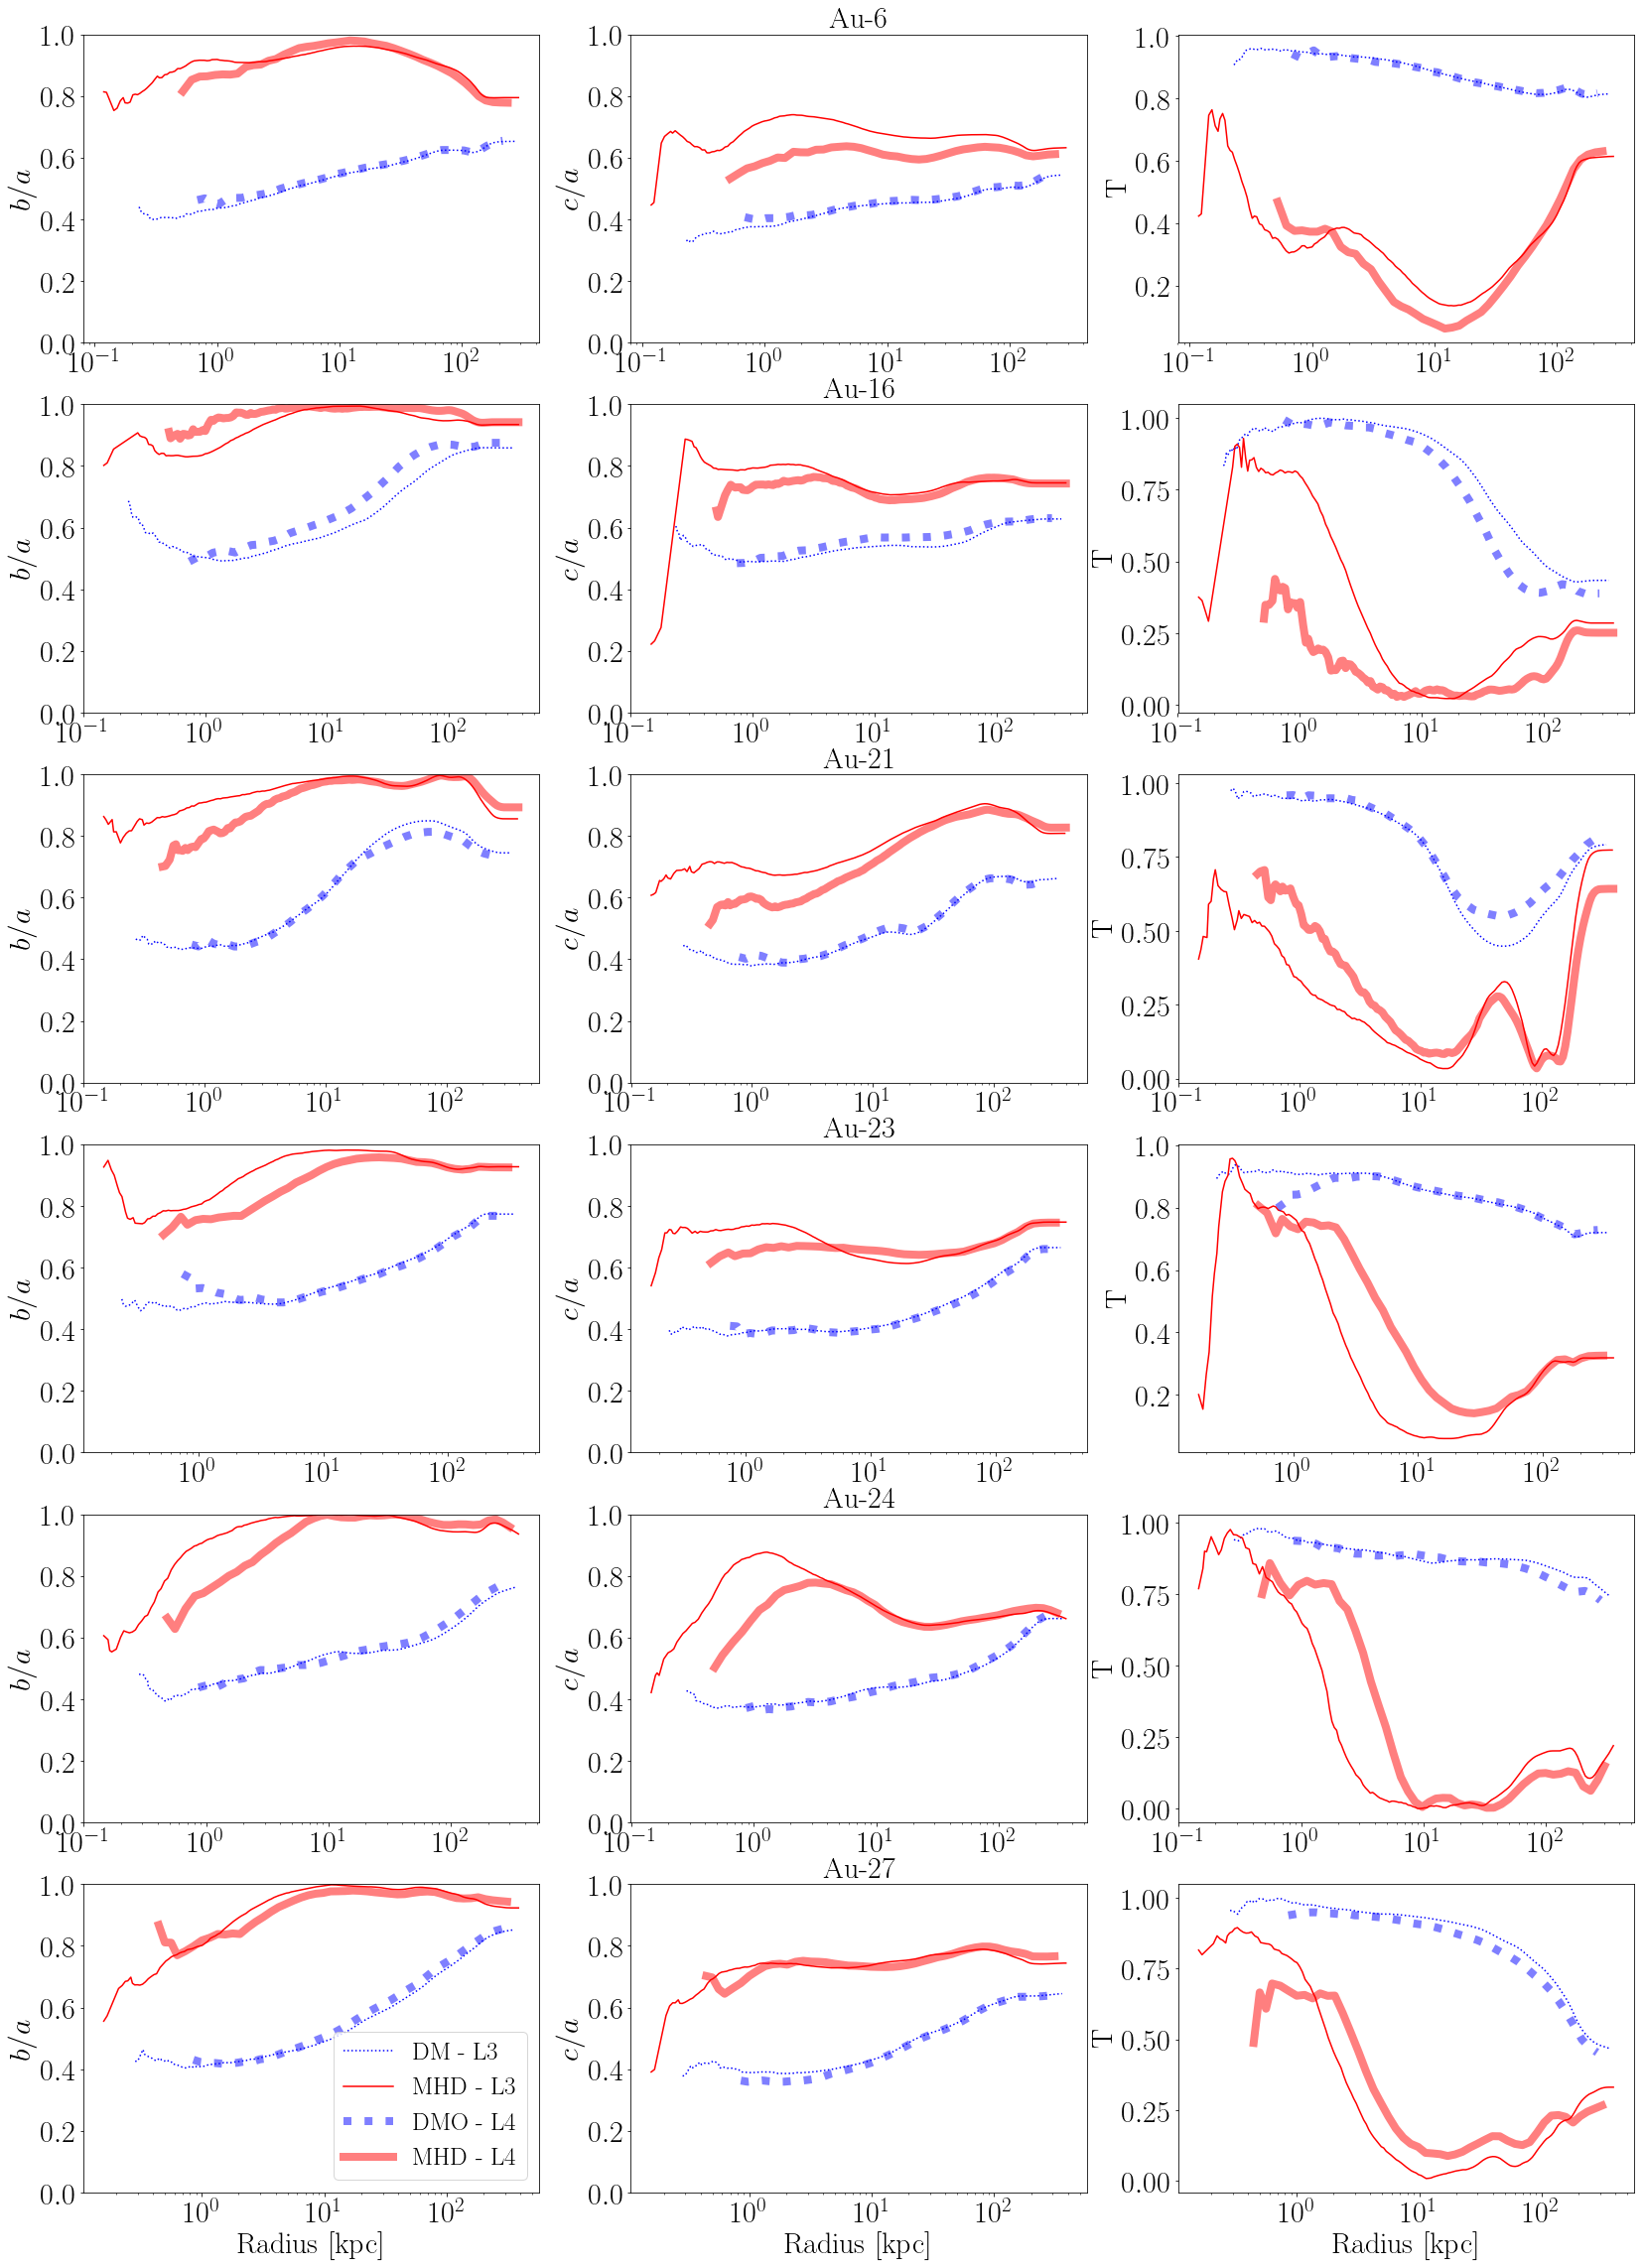

In [10]:
plt.figure(figsize=(28,40))

halonums = [6,16,21,23,24,27]
for i, i_halo in enumerate(halonums):
    plt.subplot(6,3,(3*i)+1)
    plt.plot(data_level3['radius_DM'][i_halo], data_level3['ba_DM'][i_halo], color='blue', label=r'DM - L3', linestyle=':')
    plt.plot(data_level3['radius_MHD'][i_halo], data_level3['ba_MHD'][i_halo], color='red', label=r'MHD - L3')

    plt.plot(data_level4['radius_DM'][i_halo], data_level4['ba_DM'][i_halo], 
         linewidth=8, alpha=0.5, label=r'DMO - L4', linestyle=':', color='blue')
    plt.plot(data_level4['radius_MHD'][i_halo], data_level4['ba_MHD'][i_halo], 
         linewidth=8, alpha=0.5, label=r'MHD - L4', color='red')

    plt.xscale('log')
    plt.ylabel('$b/a$')
    plt.ylim(0,1)
    
    if i==5:
        plt.legend(loc=4, fontsize=25)
        plt.xlabel('Radius [kpc]')
        
        
    plt.subplot(6,3,(3*i)+2)
    plt.plot(data_level3['radius_DM'][i_halo], data_level3['ca_DM'][i_halo], color='blue', label=r'DM - L3', linestyle=':')
    plt.plot(data_level3['radius_MHD'][i_halo], data_level3['ca_MHD'][i_halo], color='red', label=r'MHD - L3')

    plt.plot(data_level4['radius_DM'][i_halo], data_level4['ca_DM'][i_halo], 
         linewidth=8, alpha=0.5, label=r'DMO - L4', linestyle=':', color='blue')
    plt.plot(data_level4['radius_MHD'][i_halo], data_level4['ca_MHD'][i_halo], 
         linewidth=8, alpha=0.5, label=r'MHD - L4', color='red')

    plt.xscale('log')
    plt.ylabel(r'$c/a$')
    plt.ylim(0,1)
    plt.title(r'Au-${:d}$'.format(i_halo))
    
    if i==5:
        plt.xlabel('Radius [kpc]')
        
    plt.subplot(6,3,(3*i)+3)
    plt.plot(data_level3['radius_DM'][i_halo], data_level3['T_DM'][i_halo], color='blue', label=r'DM - L3', linestyle=':')
    plt.plot(data_level3['radius_MHD'][i_halo], data_level3['T_MHD'][i_halo], color='red', label=r'MHD - L3')

    plt.plot(data_level4['radius_DM'][i_halo], data_level4['T_DM'][i_halo], 
         linewidth=8, alpha=0.5, label=r'DMO - L4', linestyle=':', color='blue')
    plt.plot(data_level4['radius_MHD'][i_halo], data_level4['T_MHD'][i_halo], 
         linewidth=8, alpha=0.5, label=r'MHD - L4', color='red')

    plt.xscale('log')
    plt.ylabel('T')
    if i==5:
        plt.xlabel('Radius [kpc]')
plot_name = '../Document/shape_resolution.pdf'
plt.savefig(plot_name,bbox_inches='tight')

In [8]:
# Se define el nivel al cual se obtendran las graficas
#lvl = 'level3'
lvl = 'level4'

# Los niveles tienen un conjunto distinto de halos
halonums = None
if lvl == 'level3':
    halonums = [6,16,21,23,24,27]
if lvl == 'level4':
    halonums = range(1,31)


# Graficas exportadas a pdf
with PdfPages('../Graphs/DM_VS_MHD_'+lvl+'.pdf') as pdf:
    for i in halonums:
        # Obtiene el nombre de la carpeta para el halo especifico
        halo = 'halo_'+str(i)

        # Consulta los semiejes de DM y MHD
        arrDM = np.loadtxt("../Data/Halo_Detail/"+lvl+"_DM/"+halo+"/"+"abc_"+lvl+"_DM_"+halo+".txt", delimiter = ',')
        arrMHD = np.loadtxt("../Data/Halo_Detail/"+lvl+"_MHD/"+halo+"/"+"abc_"+lvl+"_MHD_"+halo+".txt", delimiter = ',')        
        
        # Obtiene los semiejes (planos y sin reescalar)
        aDM,bDM,cDM = arrDM[:-1].T
        aMHD,bMHD,cMHD = arrMHD[:-1].T

        # Obtiene las fracciones de los semiejes
        yvalsDM = np.array([bDM/aDM,cDM/aDM,(1-(bDM/aDM)**2)/(1-(cDM/aDM)**2)])  
        xvalsDM = (aDM*bDM*cDM)**(1./3.)
        yvalsMHD = np.array([bMHD/aMHD,cMHD/aMHD,(1-(bMHD/aMHD)**2)/(1-(cMHD/aMHD)**2)])
        xvalsMHD = (aMHD*bMHD*cMHD)**(1./3.)
        
        

        # Label de los ejes
        ylabel = ['b/a','c/a','T']

        # Define el radio virial 
        rvirDM = arrDM[-1][0]
        rvirMHD = arrMHD[-1][0]

        # La figura, cambiar tamano
        fig, axs = plt.subplots(figsize=(7,7),nrows=len(yvalsDM))
        for ax,yvalDM,yvalMHD,ylab in zip(axs,yvalsDM,yvalsMHD,ylabel):
            ax.plot(xvalsDM,yvalDM, c = 'darkblue',linestyle = '--', label = "DM")
            ax.plot(xvalsMHD,yvalMHD, c = 'darkred', label = "MHD")
            ax.plot([rvirDM,rvirDM],[0,1],c = 'darkblue',linestyle = '--')
            ax.plot([rvirMHD,rvirMHD],[0,1], c = 'darkred')
            ax.set_xscale('log')
            # Plotting ratios
            ax.set_ylim(0,1)
            # Valid for all Milkyway-like galaxies
            ax.set_xlim(0.1,rvirDM+30)
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            ax.set_ylabel(ylab,fontsize = 16)
        axs[-1].set_xlabel("R(kpc/h)",fontsize = 16)
        plt.legend(loc = 0)
        pdf.savefig(fig)
        plt.close()